In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

episodes = pd.read_csv("./logs/DMC-100km-tenByOneKm-05-12-2023_23:50.csv")

Text(0.5, 0, 'Episode')

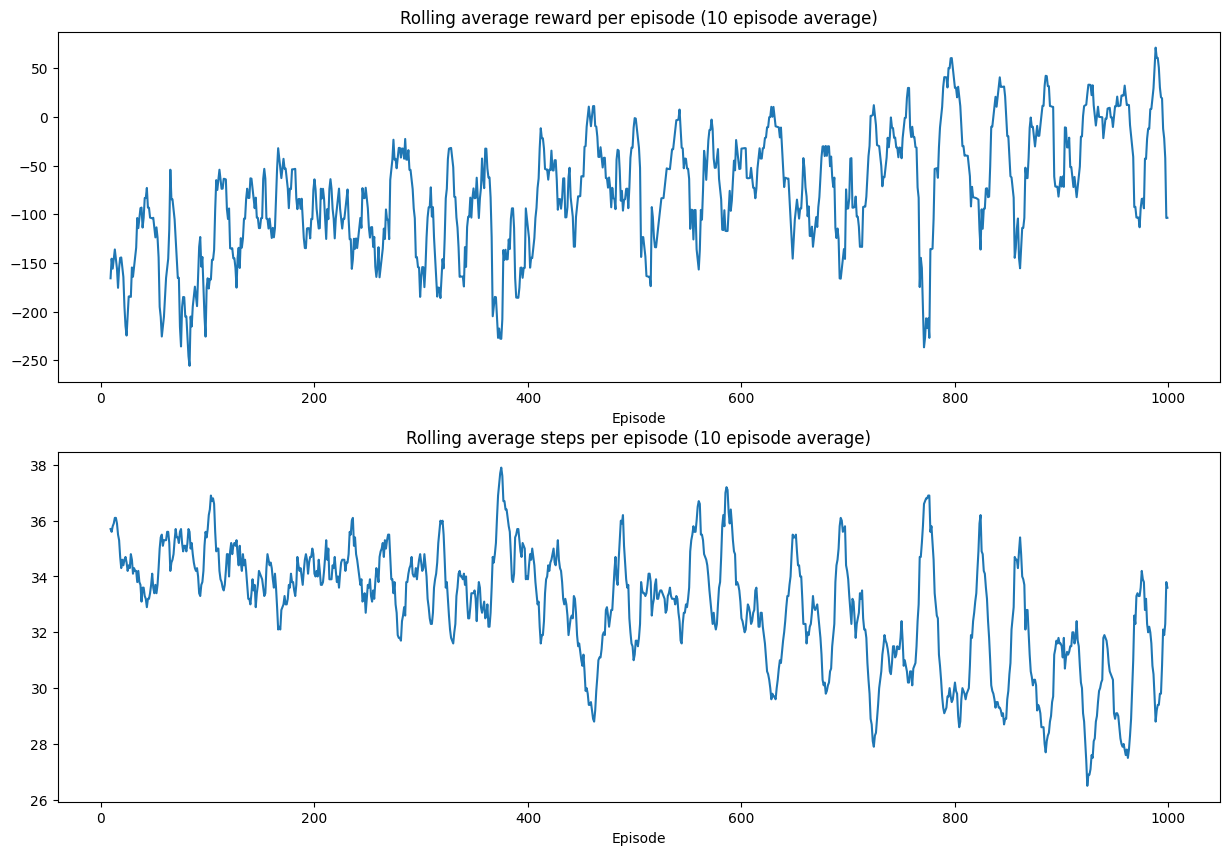

In [53]:
plt.rcParams['figure.figsize'] = [15, 10]

fig, axs = plt.subplots(2, 1)

# Create a rolling average of the total reward per episode``
episodes['rolling_reward'] = episodes['total_reward'].rolling(10).mean()

axs[0].plot(episodes['episode'], episodes['rolling_reward'])
axs[0].set_title('Rolling average reward per episode (10 episode average)')
axs[0].set_xlabel('Episode')

# ---------------------------------------------

episodes['rolling_steps'] = episodes['steps'].rolling(10).mean()

axs[1].plot(episodes['episode'], episodes['rolling_steps'])
axs[1].set_title('Rolling average steps per episode (10 episode average)')
axs[1].set_xlabel('Episode')
